In [ ]:
!pip install tensorflow

In [25]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
dataset=pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [40]:
print(dataset.shape)

(10000, 14)


In [41]:
X=dataset.iloc[:,3:13]
Y=dataset.iloc[:,13]
X.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [42]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [43]:
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [44]:
X =X.drop(['Geography','Gender'],axis=1)


In [47]:
X=pd.concat([X,geography,gender],axis=1)

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [50]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [52]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [53]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [54]:
X_train.shape

(8000, 11)

In [55]:
#Build ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [56]:
classifier=Sequential()

In [59]:
#input layer
classifier.add(Dense(units=11,activation='relu'))

In [60]:
#HL 1
classifier.add(Dense(units=7,activation='relu'))

In [61]:
#HL 2
classifier.add(Dense(units=6,activation='relu'))

In [62]:
#output layer
classifier.add(Dense(1,activation='sigmoid'))

In [89]:
import tensorflow as tf
optm=tf.keras.optimizers.Adam(learning_rate=0.001)

In [90]:
classifier.compile(optimizer=optm,loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
#early stopping
import tensorflow as tf
import keras
from keras.callbacks import EarlyStopping

early_stop=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [92]:
model_history=classifier.fit(X_train,Y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stop)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8811 - loss: 0.3111 - val_accuracy: 0.8508 - val_loss: 0.3671
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8800 - loss: 0.3006 - val_accuracy: 0.8497 - val_loss: 0.3680
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8705 - loss: 0.3162 - val_accuracy: 0.8455 - val_loss: 0.3718
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8836 - loss: 0.2970 - val_accuracy: 0.8436 - val_loss: 0.3713
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8781 - loss: 0.3043 - val_accuracy: 0.8440 - val_loss: 0.3776
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8779 - loss: 0.3090 - val_accuracy: 0.8463 - val_loss: 0.3693
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8792 - loss: 0.3080 - val_accuracy: 0.8485 - val_loss: 0.3697
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8757 - loss: 0.3096 - 

In [93]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

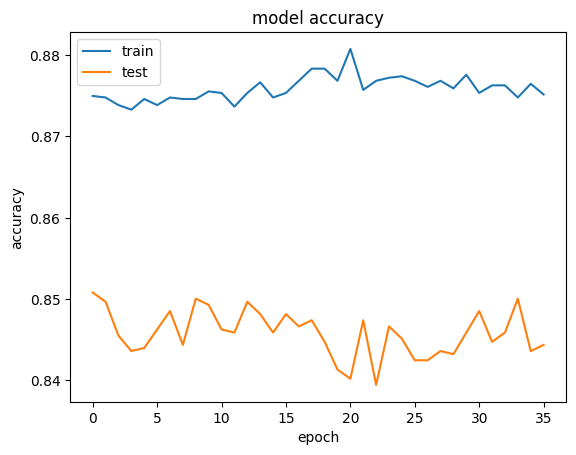

In [94]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

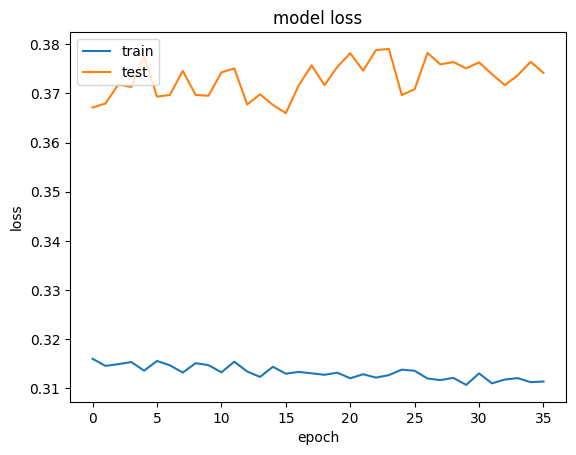

In [95]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')

In [97]:
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [100]:
#make confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,y_pred)
cm

array([[1491,  104],
       [ 191,  214]])

In [101]:
#calculate accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(Y_test,y_pred)
score

0.8525

In [102]:
## get weights
classifier.get_weights()

[array([[ 8.86597037e-02, -3.37180734e-01,  1.77500486e-01,
          1.73734456e-01, -2.23274723e-01, -2.27156669e-01,
         -3.09541970e-01,  1.43665582e-01, -2.06733614e-01,
         -1.23247087e-01],
        [-4.30968016e-01, -8.48469734e-01,  2.74546266e-01,
         -3.07911366e-01,  3.40451688e-01,  5.59383212e-03,
         -1.35664791e-01,  2.88382888e-01, -5.81305623e-01,
          9.37056065e-01],
        [-3.13183665e-01, -3.73018831e-01,  2.28565693e-01,
          1.44821763e-01, -3.11558604e-01, -5.11045098e-01,
         -1.04607202e-01,  1.59207553e-01, -2.86463443e-02,
          5.63590191e-02],
        [ 7.99396913e-03,  1.72706917e-01,  2.05804735e-01,
         -2.63238788e-01, -1.69567287e-01,  4.61812586e-01,
          3.97475660e-01,  3.23771983e-01, -3.89083326e-01,
         -5.30694366e-01],
        [ 1.47690132e-01, -1.99844390e-01,  2.57419318e-01,
          3.24723035e-01, -9.68870342e-01,  9.06711757e-01,
         -1.82506204e-01,  1.22210670e+00,  8.152893